In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Activation, Flatten, Dropout, Dense,LSTM , Embedding, Input

from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer


In [ ]:
df = pd.read_csv("FA-KES-Dataset.csv",encoding = 'unicode_escape')

In [ ]:
X = df["article_content"].tolist()
Y = df["labels"].tolist()

for i in range(len(X)): 
  X[i] = ''.join((x for x in X[i] if not x.isdigit()))

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
porter = PorterStemmer()
lancaster=LancasterStemmer()

def tokenizer_stemmer(data):
  lis = []
  for item in data:
    tokenized_words=word_tokenize(item)
    tokenized_words = [word for word in tokenized_words if word not in stopwords.words('english')]
    tokenized_sentence = []
    for word in tokenized_words:
      tokenized_sentence.append(porter.stem(word))
    lis.append(tokenized_sentence)
  return lis

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

def keras_tokenize(data):
  sequences = tokenizer.texts_to_sequences(data)
  sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences ,maxlen=300, padding='post')
  return sequences
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(x_train[1])
x_train = tokenizer_stemmer(x_train)
x_test = tokenizer_stemmer(x_test)
print(x_train[1])

August    UTC+ A representative of the Syrian Armed Forces told SANA that government forces clashed with terrorists from the Islamic State (IS) terrorist organization (banned in Russia) in  kilometers to the east of the city. "The attack of terrorists was repelled. The military and self-defense forces destroyed over  terrorists. Several SUVs with machine guns were put out of action" the military representative said. Among killed militants is IS military emissary Abu Turab who commanded formations in central Syria. The Syrian forces freed Palmyra from IS gangs on March  with support of Russian Aerospace Defense Forces. Russian sappers helped Syrian authorities to demine historical monuments of the ancient city which used to be called "a pearl of the Syrian desert."
['august', 'utc+', 'a', 'repres', 'syrian', 'arm', 'forc', 'told', 'sana', 'govern', 'forc', 'clash', 'terrorist', 'islam', 'state', '(', 'is', ')', 'terrorist', 'organ', '(', 'ban', 'russia', ')', 'kilomet', 'east', 'citi', 

In [ ]:
x_train = keras_tokenize(x_train)
x_test = keras_tokenize(x_test)


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test.shape

(161, 300)

In [ ]:
x_train[70]

array([ 559,  699,  831,    9,  271,  354,   79,  120,   85,  102,   18,
        119,  902,  182,  447,  144, 5679,   79, 3526,  211, 5680,  147,
       2149,  447,  401,  391,  108, 2924,  209,   21,  354,  676,    9,
       5682,   49,   10, 1472,  136,  704,  354,  146,   49,  850,   21,
         44,   85,    9,  174,  443,  804,   79,    7,  148,  271,  975,
       1547, 1987, 2545,  414,  415, 1905,  563,  452,   74,  174,   44,
       1864,  174,   79,    1,  271,  993, 2545,  414,  174,  119,  330,
          1,   69, 2023, 1464, 5684,   69,    9,  187,   79, 3825, 1651,
        144,  873,    9,  644,   85,  112,   24,   79,  180,  907,   79,
        286,  354, 2149,   69, 1961,  155,  147,   69,  258,  354,   79,
        907,  633,   85,  803, 5688, 4540, 3731,  354,    9,  271,   18,
        832,  468,  468,  391,  209,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
model = Sequential()
model.add(Embedding(100,300, input_length=300))
model.add(Conv1D(128,5,activation="relu"))
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.compile("Adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history1 = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          30000     
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 148, 128)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 242,769
Trainable params: 242,769
Non-trainable params: 0
__________________________________________________

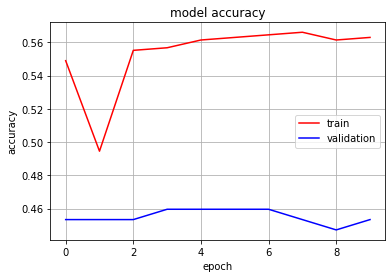

In [ ]:
fig = plt.figure()
plt.plot(history1.history['accuracy'],'r')
plt.plot(history1.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

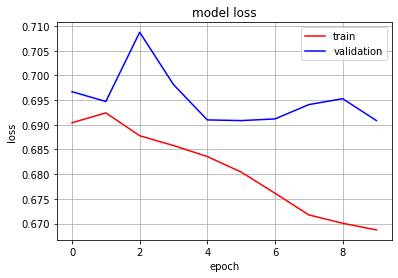

In [ ]:
fig = plt.figure()
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [ ]:
y_pred = model.predict(x_test)


6/6 [==============================] - 0s 6ms/step


In [ ]:
report = classification_report(np.array(y_test.tolist()), y_pred.round())
print(report)

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        88
           1       0.45      0.99      0.62        73

    accuracy                           0.45       161
   macro avg       0.48      0.50      0.32       161
weighted avg       0.48      0.45      0.29       161



[[ 1 87]
 [ 1 72]]


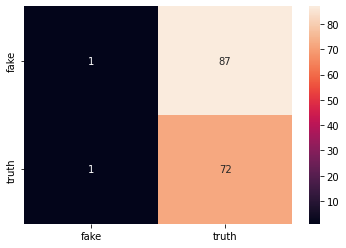

In [ ]:

matrix = confusion_matrix(np.array(y_test.tolist()), y_pred.round())
print(matrix)

#Plots
df_cm = pd.DataFrame(matrix, columns=['fake', 'truth'], index=['fake', 'truth'])
sns.heatmap(df_cm, annot=True)

In [ ]:
model = Sequential()
model.add(Embedding(100,300, input_length=300))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.compile("Adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history1 = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          30000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                42624     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 72,657
Trainable params: 72,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/11 [==============================] - 2s 68ms/step - loss: 0.6901 - accuracy: 0.5397 - val_loss: 0.7133 - val_accuracy: 0.4534
Epoch 2/10
11/11 [==============================] - 0s 24ms/step - loss: 0.6924 - accuracy: 0.5490 - val_loss: 0.7307 - val_accuracy: 0.4534
Epoch 3/10
11/11 [==============

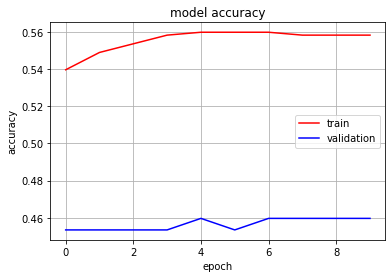

In [ ]:
fig = plt.figure()
plt.plot(history1.history['accuracy'],'r')
plt.plot(history1.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

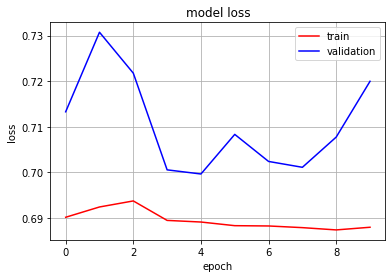

In [ ]:
fig = plt.figure()
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [ ]:
report = classification_report(np.array(y_test.tolist()), y_pred.round())
print(report)

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        88
           1       0.45      0.99      0.62        73

    accuracy                           0.45       161
   macro avg       0.48      0.50      0.32       161
weighted avg       0.48      0.45      0.29       161

